In [3]:
import numpy as np
import pandas as pd
import re
import sys
from tqdm import tqdm


In [4]:
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages")

In [5]:
from fastai.text import *

In [6]:
#read in data
df = pd.read_csv('realdonaldtrump.csv')

In [7]:
#im really only interested in trump tweets after he became a political figure, 
#so I'm dropping tweets from before he anncounced his canidacy
mask = (df['date'] > '2015-06-16')
df = df.loc[mask]

In [8]:
data = df["content"]
data.columns = ["text"]
train = data

train.to_csv("./trump_tweet_gen_train.csv")

In [9]:
def remove_punc(text):
    new_text = re.sub(r'[^\w\s]', '', text) 
    return new_text

In [10]:
#remove punctuation
for i in train.index:
    train.loc[i] = remove_punc(train.loc[i])

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
train

23278      realJoeMurray Hopefully tomorrow is the day ...
23279    brentcfritz Today is the day America becomes g...
23280      insuraider  realDonaldTrump is going to make...
23281      DONJUBBER  realDonaldTrump Shock the world  ...
23282      PianoBecca  realDonaldTrump No Amercian real...
                               ...                        
43347    Joe Biden was a TOTAL FAILURE in Government He...
43348    Will be interviewed on  seanhannity tonight at...
43349                              pictwittercom3lm1spbU8X
43350                              pictwittercomvpCE5MadUz
43351                              pictwittercomVLlc0BHW41
Name: content, Length: 20074, dtype: object

In [12]:
train = pd.DataFrame(train)
train

,content
23278,realJoeMurray Hopefully tomorrow is the day ...
23279,brentcfritz Today is the day America becomes g...
23280,insuraider realDonaldTrump is going to make...
23281,DONJUBBER realDonaldTrump Shock the world ...
23282,PianoBecca realDonaldTrump No Amercian real...
...,...
43347,Joe Biden was a TOTAL FAILURE in Government He...
43348,Will be interviewed on seanhannity tonight at...
43349,pictwittercom3lm1spbU8X
43350,pictwittercomvpCE5MadUz


In [13]:
data = (TextList.from_df(train, cols='content')
                .split_by_rand_pct(0.1)
                .label_for_lm()  
                .databunch(bs=48))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [14]:
data.show_batch()

idx,text
0,xxup xxunk realdonaldtrump xxmaj shock the world trump4president xxbos xxunk realdonaldtrump xxmaj no xxmaj xxunk really can impact such staggering influence xxmaj stay xxmaj true xxmaj great and xxunk xxunk xxmaj america xxup great xxbos _ xxmaj xxunk realdonaldtrump xxmaj love it xxmaj always respect xxup fighters over overrated loser xxup xxunk xxmaj inspire xxup greatness xxup trump 2016 xxbos xxunk xxunk xxmaj we all know xxunk e best xxup
1,to xxunk xxmaj build a wall xxmaj lets xxmaj make xxmaj america xxmaj great xxmaj again xxbos xxmaj via xxunk xxup xxunk xxmaj trump changing xxunk for xxmaj saturday rally in xxmaj arizona due to xxup overwhelming xxunk xxbos xxmaj iran continues to delay the nuclear deal while doing many bad things behind our backs xxmaj time to xxup walk and double the sanctions xxmaj stop payments xxbos xxunk xxmaj
2,makeamericagreatagain xxmaj trump2016 xxbos xxunk realdonaldtrump xxup trump xxup stands xxup for xxup truth xxbos jimlibertarian xxunk michaelcohen212 we the people are making it quite clear xxmaj donald is the xxmaj peoples choice we want xxunk xxbos xxmaj xxunk jimlibertarian xxunk michaelcohen212 xxmaj that is why i like xxmaj mr xxmaj trump he speaks the truth and stands by it xxbos xxmaj xxunk is the mother of good luck xxmaj
3,on immigration xxbos richlowry is truly one of the dumbest of the talking heads he does nt have a clue xxbos xxunk xxmaj xxunk xxunk theblaze megynkelly realdonaldtrump that s ok xxmaj the more they talk the better xxup potus xxmaj trump looks xxbos xxunk seanhannity realdonaldtrump xxmaj what happened to xxmaj the xxmaj pledge xxmaj walker quits and slams xxmaj trump xxmaj losers proving xxmaj pledge was sham xxbos
4,as usual makeamericagreatagain teamtrump xxmaj trumptrain xxbos xxunk realdonaldtrump xxmaj great interview xxmaj thanks xxbos xxunk foxnews xxmaj we want xxmaj donald xxmaj xxunk next president trumptrain trumpforpresident xxmaj we will all xxup make xxup america xxup great xxup again xxbos xxmaj xxunk realdonaldtrump foxnews xxmaj ca nt wait for megynkelly to jump on the xxup trump xxmaj train as xxmaj chris xxmaj wallace just did xxmaj wo nt happen


In [15]:
#instantiate model
model = language_model_learner(data, AWD_LSTM, drop_mult=0.1, model_dir = '/Users/user/desktop/metis/projects/metis-project-4/tweet_generator_model')

#find learning rate
model.lr_find()

# Fit the model 
model.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,3.936797,3.773926,0.304872,13:50


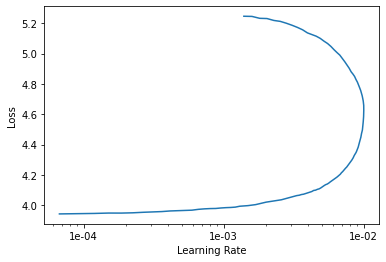

In [16]:
model.recorder.plot()

In [17]:
print(model.predict("I think CNN is", 20, temperature=0.75))

I think CNN is not a bad guy It is true CNN and Fake News Media is looking at


In [18]:
print(model.predict("I think Fox News is", 20, temperature=0.75))

I think Fox News is a joke and its that is a joke xxbos The story is about the American Flag


In [19]:
print(model.predict("Russia has", 20, temperature=0.75))

Russia has a great impact on our country xxbos The Russian Witch Hunt continues for years and has


In [20]:
print(model.predict("Mueller Report", 20, temperature=0.75))

Mueller Report is a virtual Mueller Report that is Mueller Report and other thought positions It is


In [21]:
print(model.predict("Impeachment", 20, temperature=0.75))

Impeachment is one of the greatest political expenses in the history of the United States This is the


In [22]:
print(model.predict("COVID is a ", 20, temperature=0.75))

COVID is a  Foreign Intelligence Committee reporter who speaks about all of Hillary s campaign and the President


In [24]:
trump_tweet_predict('North Korea', 10)

North Korea is a part of the United States of


In [25]:
import pickle

In [31]:
# save the model to disk
model.export('trump_tweet_gen.pkl')

In [32]:
def trump_tweet_predict(starter, n):
    x = load_learner('', 'trump_tweet_gen.pkl')
    result = x.predict(starter, n, temperature=0.75)
    return print(result)